# Predicting Match Outcomes for the FIFA Women's World Cup 2019
*A case study in Bayesian modeling*

by Derek Miller

In [1]:
import numpy as np
import utils
import vis
from importlib import reload
reload(utils)
reload(vis)

df = utils.get_df()
df.sample(10)

,group,team,game,opponent,attempts,on_target,off_target,goals_for,goals_against,on_target_against,on_target_rate,fail_to_save_rate
23,F,GERMANY,1,FRANCE,10,1,6,0,1,1,0.100000,1.000000
86,W,WALES,4,DENMARK,11,1,5,0,4,8,0.090909,0.500000
64,E,SWEDEN,3,POLAND,12,4,5,3,2,6,0.333333,0.333333
44,F,HUNGARY,2,FRANCE,5,3,1,1,1,4,0.600000,0.250000
35,C,AUSTRIA,2,NETHERLANDS,8,1,6,0,2,3,0.125000,0.666667
40,E,SWEDEN,2,SLOVAKIA,13,4,6,1,0,0,0.307692,NaN
14,D,SCOTLAND,1,CZECH REP,19,5,3,0,2,7,0.263158,0.285714
43,E,POLAND,2,SPAIN,5,2,3,1,1,5,0.400000,0.200000
41,E,SLOVAKIA,2,SWEDEN,10,0,5,0,1,4,0.000000,0.250000
58,C,N MACEDONIA,3,NETHERLANDS,12,1,7,0,3,6,0.083333,0.500000


/home/derek/repos/fifa-world-cup/vis.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))
  bad.set_bad("grey",alpha=.3)


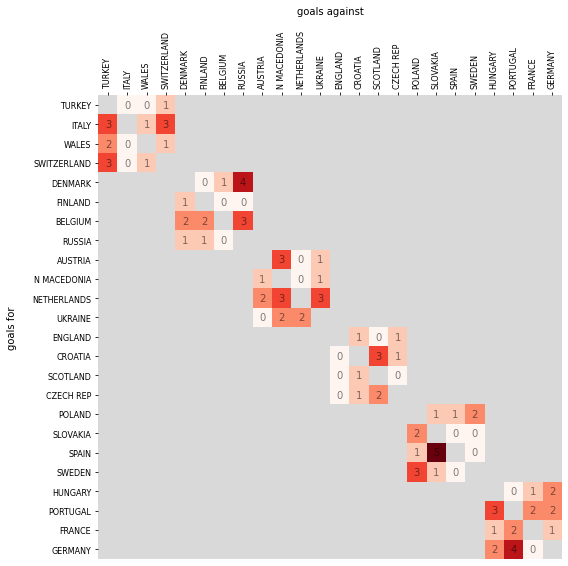

In [2]:
G = utils.get_goal_matrix(m=1,n=3) # the group stage scores
vis.plot_goal_matrix(np.round(G))

In [3]:
data = utils.get_stan_data()

In [4]:
print(data.keys())
print(data['Y'].shape)

dict_keys(['N', 'T', 'I', 'J', 'X', 'X1', 'X2', 'X3', 'X4', 'Y'])
(24, 24)


In [5]:

FIT = utils.run_stan_model('poisson4.stan', 'UEFA2020', m=1,n=7, iter=5000)
print(FIT)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6b67689ebe55dc2493255d1ff24f01d5 NOW.


Inference for Stan model: anon_model_6b67689ebe55dc2493255d1ff24f01d5.
4 chains, each with iter=5000; warmup=2500; thin=1; 
post-warmup draws per chain=2500, total post-warmup draws=10000.

               mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
attempts[1]    6.85    0.02   2.56   2.81   4.98   6.52   8.36  12.74  10830    1.0
attempts[2]    13.5    0.03   3.19   8.03  11.27  13.23  15.44  20.48  10531    1.0
attempts[3]     6.0    0.02   2.22   2.48   4.39   5.73   7.33  11.03  11430    1.0
attempts[4]    9.97    0.03    2.7   5.41   8.05   9.72  11.64  16.06  10910    1.0
attempts[5]    12.1    0.03    2.9   7.19  10.02  11.81  13.89  18.44  10108    1.0
attempts[6]     3.7    0.02    1.9   1.01    2.3   3.37   4.72   8.34  11773    1.0
attempts[7]    8.09    0.02   2.33   4.29    6.4   7.81   9.51  13.31  11034    1.0
attempts[8]    6.13    0.02   2.49   2.27   4.36   5.77   7.53  11.91  11139    1.0
attempts[9]    8.74    0.03   2.73    4.3   6.76   8.4

/home/derek/repos/fifa-world-cup/vis.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))
  bad.set_bad("grey",alpha=.3)


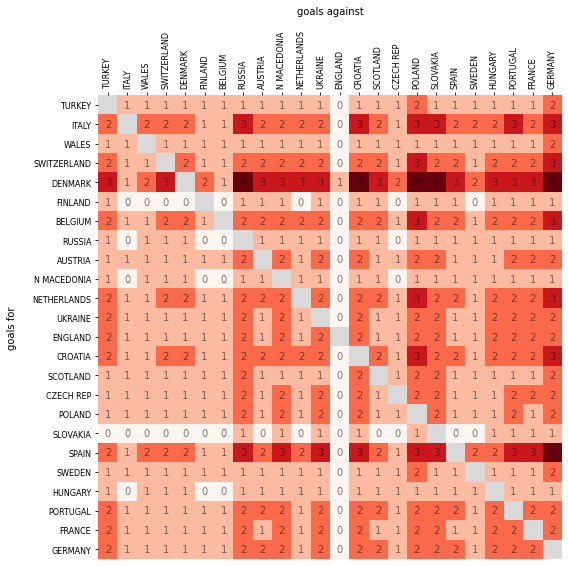

In [6]:
EG_poisson = FIT.extract(pars=['EG'])['EG']
vis.plot_goal_matrix(np.round(EG_poisson.mean(axis=0)))

/home/derek/repos/fifa-world-cup/vis.py:27: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("Reds"))
  bad.set_bad("grey",alpha=.3)


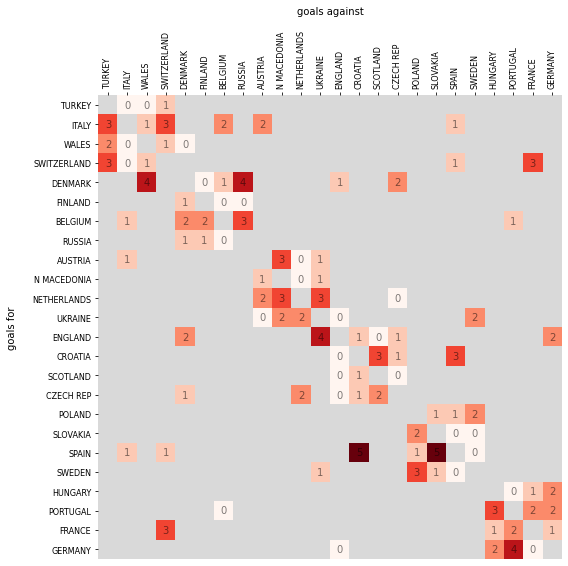

In [7]:
G_all = utils.get_goal_matrix(m=1,n=6)
vis.plot_goal_matrix(G_all)

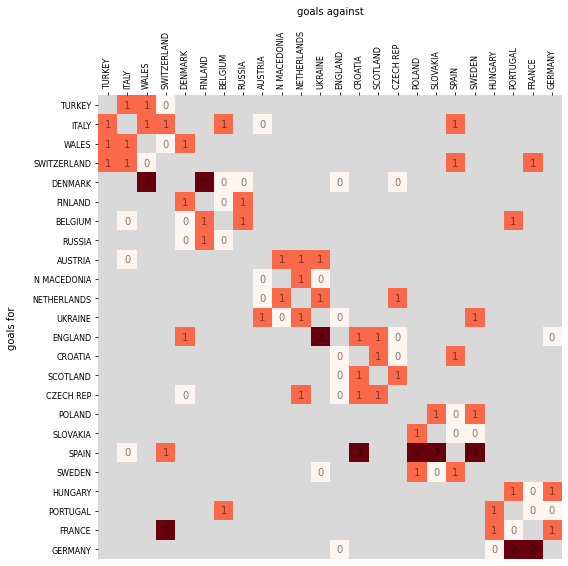

In [38]:
vis.plot_goal_matrix(np.round(np.absolute(EG_poisson.mean(axis=0)-G_all)))

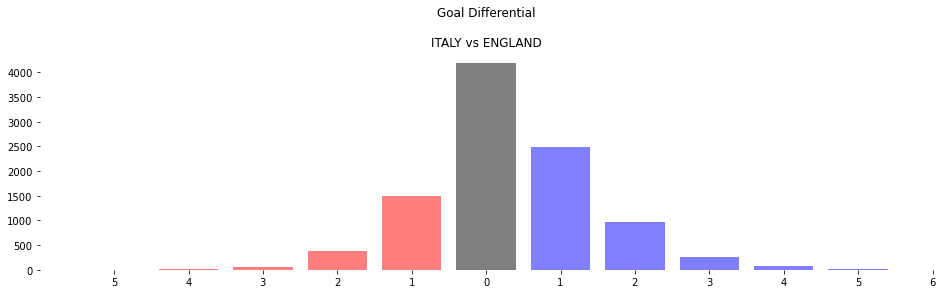

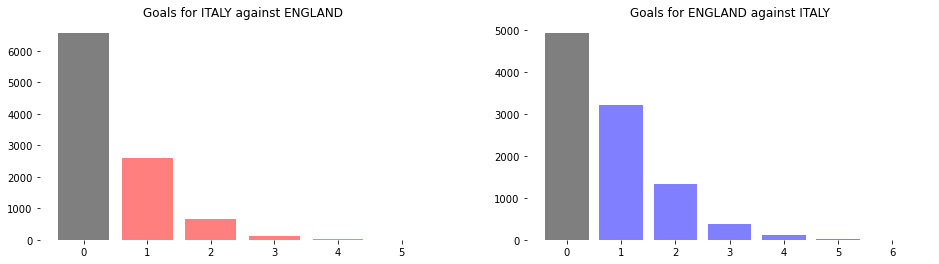

In [9]:
vis.plot_goaldiff("ITALY", "ENGLAND", EG_poisson)
vis.plot_goals("ITALY", "ENGLAND", EG_poisson)

In [60]:
tix = utils.get_team_to_index(utils.teams)
print(tix['ITALY'],tix['ENGLAND'])
goals_for_italy = EG_poisson[:,1,12]
goals_for_england = EG_poisson[:,12,1]

2 13


In [61]:
outcomes = []
for i in range(len(goals_for_italy)):
    outcomes.append('{0}-{1}'.format(np.round(goals_for_italy[i]).astype(int), np.round(goals_for_england[i]).astype(int)))
# print(outcomes)
vals, counts = np.unique(outcomes, return_counts=True)
print(vals)
print(counts)
outdf = utils.pd.DataFrame({'score':vals, 'counts':counts, 'pct':counts/counts.sum()}).sort_values(by='counts',ascending=False)
# for i,v in enumerate(vals):
#     print(vals,'\t',counts[i])

['0-0' '0-1' '0-2' '0-3' '0-4' '0-5' '0-6' '1-0' '1-1' '1-2' '1-3' '1-4'
 '1-5' '1-6' '2-0' '2-1' '2-2' '2-3' '2-4' '2-5' '3-0' '3-1' '3-2' '3-3'
 '3-4' '3-5' '4-0' '4-1' '4-2' '4-3' '4-4' '5-0' '5-1' '5-3']
[3267 2104  866  234   81   14    5 1264  853  362  104   20    4    2
  340  207   70   23    8    2   55   44   27    7    2    1   13   10
    3    1    1    4    1    1]


In [62]:
vals, counts = np.unique(goals_for_italy + goals_for_england, return_counts=True)
utils.pd.DataFrame({'sum':vals, 'counts':counts, 'pct':counts/counts.sum()}).sort_values(by='counts', ascending=False)

,sum,counts,pct
1,1.0,3368,0.3368
0,0.0,3267,0.3267
2,2.0,2059,0.2059
3,3.0,858,0.0858
4,4.0,312,0.0312
5,5.0,98,0.0098
6,6.0,28,0.0028
7,7.0,7,0.0007
8,8.0,3,0.0003


In [29]:
goaldiff = goals_for_italy - goals_for_england

L = [(goaldiff>0).sum(), (goaldiff<0).sum(), (goaldiff==0).sum()]
ODDS = [L[0]/(L[1]+L[2]), L[1]/(L[0]+L[2]), L[2]/(L[0]+L[1])]
L = np.array(L)/10000

label = ['italy  :','england:','draw   :']

for i in range(3):
    print(label[i], '\todds', ODDS[i], '\tprob', L[i])

italy  : 	odds 0.24533001245330013 	prob 0.197
england: 	odds 0.6212710765239948 	prob 0.3832
draw   : 	odds 0.7235436056532231 	prob 0.4198


In [31]:
# 2/1, 6/4, 21/10
EG_poisson.mean(axis=0)[1,12],EG_poisson.mean(axis=0)[12,1]

(0.4459, 0.758)

In [32]:
EG_poisson.mean(axis=0)[1,12]*1.5,EG_poisson.mean(axis=0)[12,1]*1.5

(0.6688500000000001, 1.137)

In [34]:
2/3,6/10,21/31

(0.6666666666666666, 0.6, 0.6774193548387096)

In [36]:
2.1/(2.1+1),1.67/(1.67+1)

(0.6774193548387097, 0.6254681647940075)

In [53]:
ix = ((goals_for_italy>=1) & (goals_for_england>=1))

draws = []
outcomes = []
for i,j in zip(goals_for_italy[ix], goals_for_england[ix]):
    if i-j != 0:
        outcomes.append('{0}-{1}'.format(int(i),int(j)))
vals, counts = np.unique(outcomes, return_counts=True)



utils.pd.DataFrame({'result':vals, 'counts':counts, 'percent':counts/counts.sum()}).sort_values(by='counts', ascending=False)

,result,counts,percent
0,1-2,362,0.440389
5,2-1,207,0.251825
1,1-3,104,0.126521
9,3-1,44,0.053528
10,3-2,27,0.032847
6,2-3,23,0.027981
2,1-4,20,0.024331
13,4-1,10,0.012165
7,2-4,8,0.009732
3,1-5,4,0.004866


In [54]:
attempts = FIT.extract(pars=['attempts'])['attempts']
sot_rate = FIT.extract(pars=['sot_rate'])['sot_rate']
fts_rate = FIT.extract(pars=['fts_rate'])['fts_rate']

In [59]:
print(attempts[1].mean(), attempts[12].mean())
print(sot_rate[1].mean(), sot_rate[12].mean())
print(fts_rate[1].mean(), fts_rate[12].mean())

8.574286284448307 7.78143226594232
0.4202118632452089 0.45000304978475664
0.3773632744491196 0.3976928896546356


In [66]:
outdf['percent'] = np.round(outdf['pct'],2)

In [72]:
scoremat = outdf[outdf['percent']!=0][['score','percent']].copy()

In [73]:
S = []
for i in range(scoremat.shape[0]):
    scorelist = scoremat['score'].values[i].split('-')
    S.append([int(scorelist[0]), int(scorelist[1])])
S = np.array(S)
S

array([[0, 0],
       [0, 1],
       [1, 0],
       [0, 2],
       [1, 1],
       [1, 2],
       [2, 0],
       [0, 3],
       [2, 1],
       [1, 3],
       [0, 4],
       [2, 2],
       [3, 0]])

In [75]:
Z = np.zeros((S.max(), S.max()))
for i in range(len(S)):
    Z[S[0],row[1]] += scoremat['percent'].values[i]
Z

IndexError: index 4 is out of bounds for axis 1 with size 4